In [1]:
import os
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
get_ipython().run_line_magic('matplotlib', 'inline')
from matplotlib.ticker import ScalarFormatter

In [2]:
# Reading in the raw datasets and storing in a dataframe.
confirmed = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv")
recovered = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv")
deaths = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv")

# Cleaning the dataframes and handling dates correctly, also calculating totals for graphs
confirmed = confirmed.drop(columns=['Lat','Long'])
confirmed = confirmed.groupby('Country/Region').sum()
confirmed = confirmed.transpose()
confirmed['Date'] = pd.to_datetime(confirmed.index)
confirmed = confirmed.sort_values(by=['Date'])
confirmed = confirmed.set_index("Date")
all_confirmed = confirmed.sum(axis = 1)

recovered = recovered.drop(columns=['Lat','Long'])
recovered = recovered.groupby('Country/Region').sum()
recovered = recovered.transpose()
recovered['Date'] = pd.to_datetime(recovered.index)
recovered = recovered.sort_values(by=['Date'])
recovered = recovered.set_index("Date")
all_recovered = recovered.sum(axis = 1)

deaths = deaths.drop(columns=['Lat','Long'])
deaths = deaths.groupby('Country/Region').sum()
deaths = deaths.transpose()
deaths['Date'] = pd.to_datetime(deaths.index)
deaths = deaths.sort_values(by=['Date'])
deaths = deaths.set_index("Date")
all_deaths = deaths.sum(axis = 1)

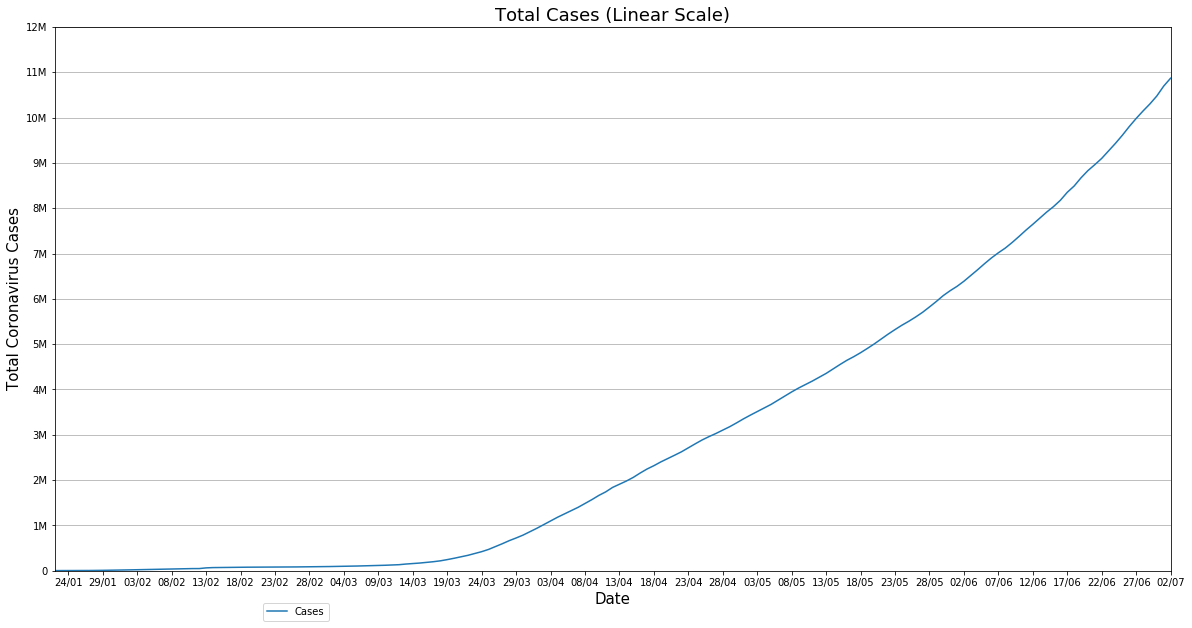

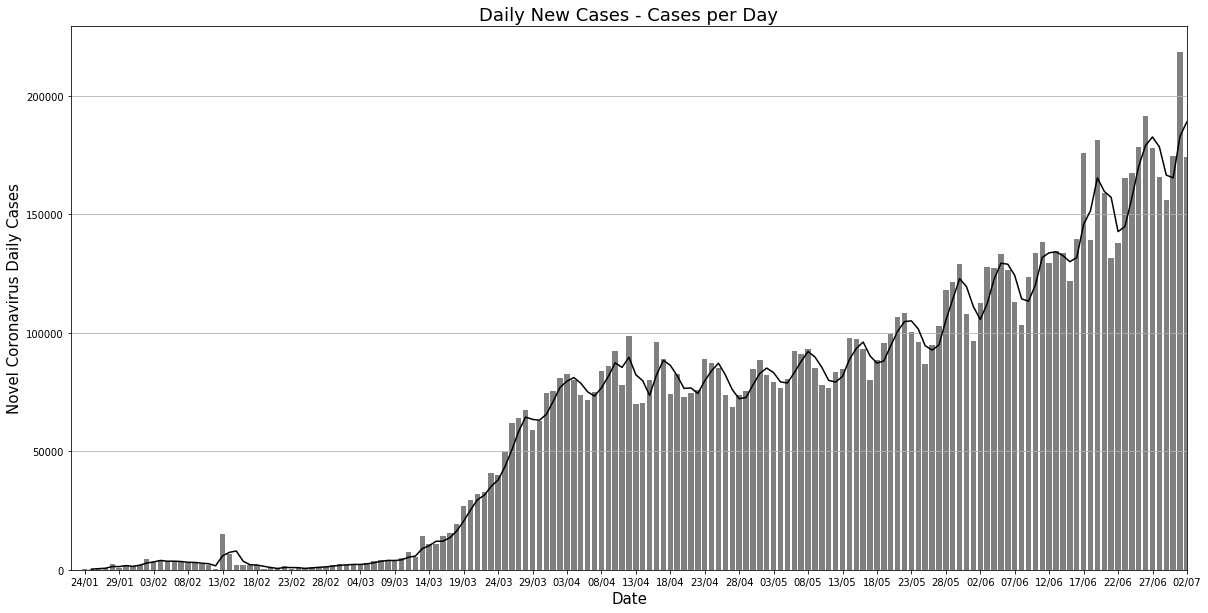

In [3]:
# Total Cases by Country
name_of_y_ticks = [0,1000000,2000000,3000000,4000000,5000000,6000000,7000000,8000000,9000000,10000000, 11000000, 12000000]
change_it_to_what_you_want = [0,'1M','2M','3M','4M','5M','6M','7M','8M','9M','10M', '11M', '12M']

fig, ax = plt.subplots(figsize = (20, 10))
ax.plot(all_confirmed, Label = 'Cases')

# Setting the limits for the graph area
axes = plt.gca()
axes.set_ylim([0,12000000])
axes.set_xlim([all_confirmed.index.values[0], all_confirmed.index.values[-1]])

# Setting the descriptional details
ax.set_ylabel("Total Coronavirus Cases", fontsize = 15)
ax.set_xlabel("Date", fontsize = 15)
ax.set_title("Total Cases (Linear Scale)", fontsize = 18)

# Formatting the dates for the x-axis
date_form = mdates.DateFormatter("%d/%m")
ax.xaxis.set_major_formatter(date_form)
ax.xaxis.set_major_locator(mdates.HourLocator(interval = 120))
ax.grid(axis = 'y')

# Adding the legend below the x-axis
plt.legend(loc = 'upper right', bbox_to_anchor = (0.25, -0.05))
plt.yticks(name_of_y_ticks, change_it_to_what_you_want)
plt.show()


# Daily New Cases
# Plotting the two different graphs
fig, ax = plt.subplots(figsize = (20, 10))
ax.bar(all_confirmed.diff().index.values, all_confirmed.diff().values, color = 'grey', label = 'Daily Cases')
ax.plot(all_confirmed.diff().rolling(window = 3).mean(), color = 'black', label = '3-day Moving Average')

# Setting up descriptional details
ax.set_ylabel("Novel Coronavirus Daily Cases", fontsize = 15)
ax.set_xlabel("Date", fontsize = 15)
ax.set_title("Daily New Cases - Cases per Day", fontsize = 18)

# Formatting the dates for the x-axis
date_form = mdates.DateFormatter("%d/%m")
ax.xaxis.set_major_formatter(date_form)
ax.xaxis.set_major_locator(mdates.HourLocator(interval = 120))

axes = plt.gca()
axes.set_xlim([all_confirmed.index.values[0], all_confirmed.index.values[-1]])
ax.grid(axis = 'y')

plt.show()

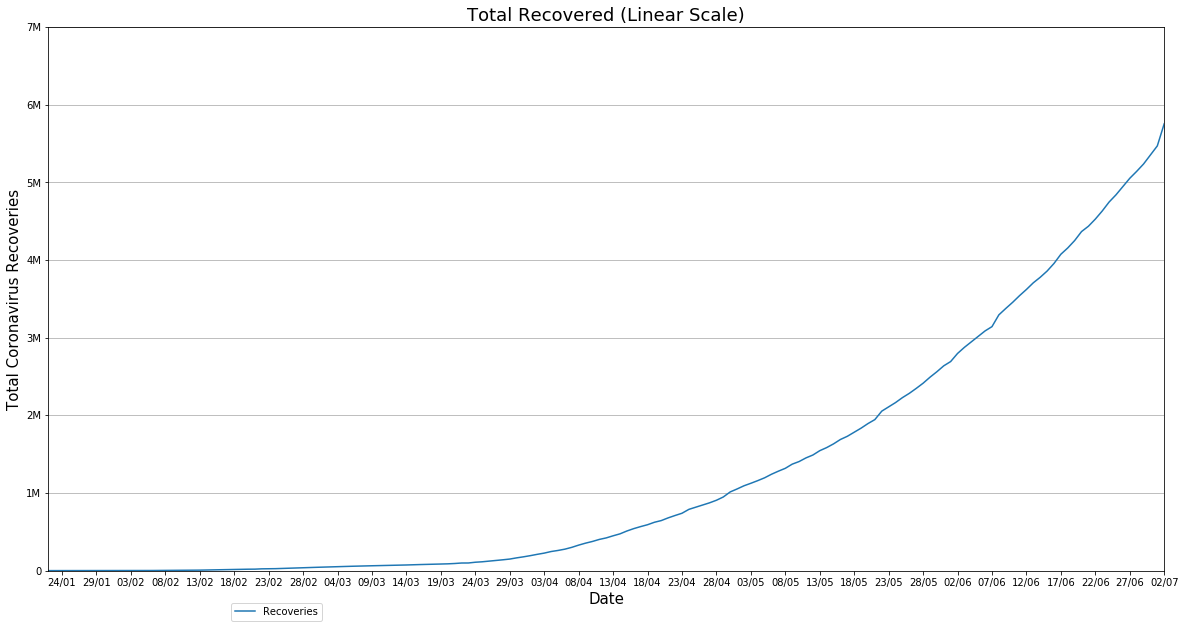

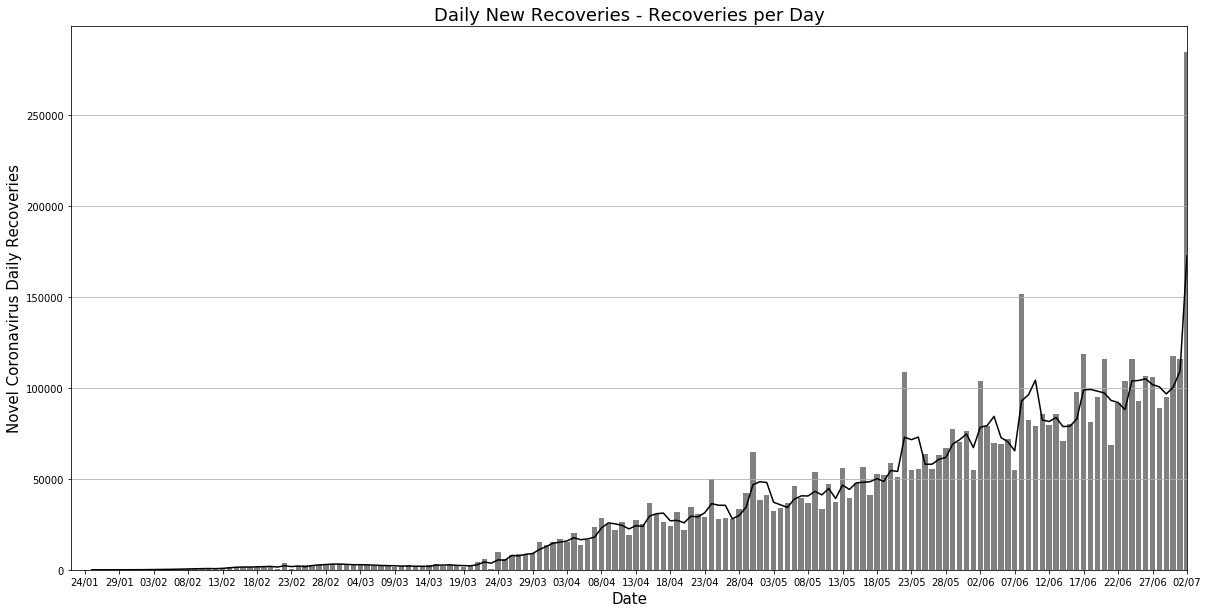

In [4]:
# Total Recovered by country
name_of_y_ticks = [0,1000000,2000000,3000000,4000000,5000000,6000000,7000000]
change_it_to_what_you_want = [0,'1M','2M','3M','4M','5M','6M','7M']

fig, ax = plt.subplots(figsize = (20, 10))
ax.plot(all_recovered, Label = 'Recoveries')

# Setting the limits for the graph area
axes = plt.gca()
axes.set_ylim([0,7000000])
axes.set_xlim([all_recovered.index.values[0], all_recovered.index.values[-1]])

# Setting up descriptional details
ax.set_ylabel("Total Coronavirus Recoveries", fontsize = 15)
ax.set_xlabel("Date", fontsize = 15)
ax.set_title("Total Recovered (Linear Scale)", fontsize = 18)

# Formatting the dates for the x-axis
date_form = mdates.DateFormatter("%d/%m")
ax.xaxis.set_major_formatter(date_form)
ax.xaxis.set_major_locator(mdates.HourLocator(interval = 120))
ax.grid(axis = 'y')

# Adding legend below the x-axis
plt.legend(loc = 'upper right', bbox_to_anchor = (0.25, -0.05))
plt.yticks(name_of_y_ticks, change_it_to_what_you_want)
plt.show()


# Daily New Recoveries
# Plotting two different graphs
fig, ax = plt.subplots(figsize = (20, 10))
ax.bar(all_recovered.diff().index.values, all_recovered.diff().values, color = 'grey')
ax.plot(all_recovered.diff().rolling(window = 3).mean(), color = 'black')

# Setting up descriptional details
ax.set_ylabel("Novel Coronavirus Daily Recoveries", fontsize = 15)
ax.set_xlabel("Date", fontsize = 15)
ax.set_title("Daily New Recoveries - Recoveries per Day", fontsize = 18)

# Formatting the dates for the x-axis
date_form = mdates.DateFormatter("%d/%m")
ax.xaxis.set_major_formatter(date_form)
ax.xaxis.set_major_locator(mdates.HourLocator(interval = 120))

axes = plt.gca()
axes.set_xlim([all_recovered.index.values[0], all_recovered.index.values[-1]])
ax.grid(axis = 'y')

plt.show()

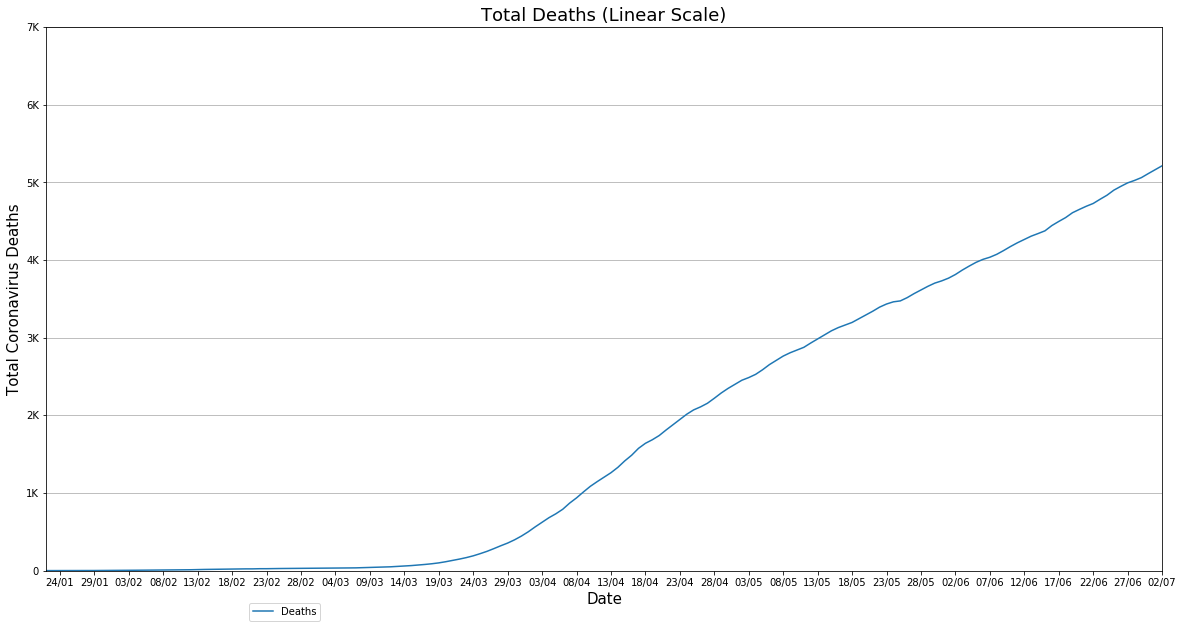

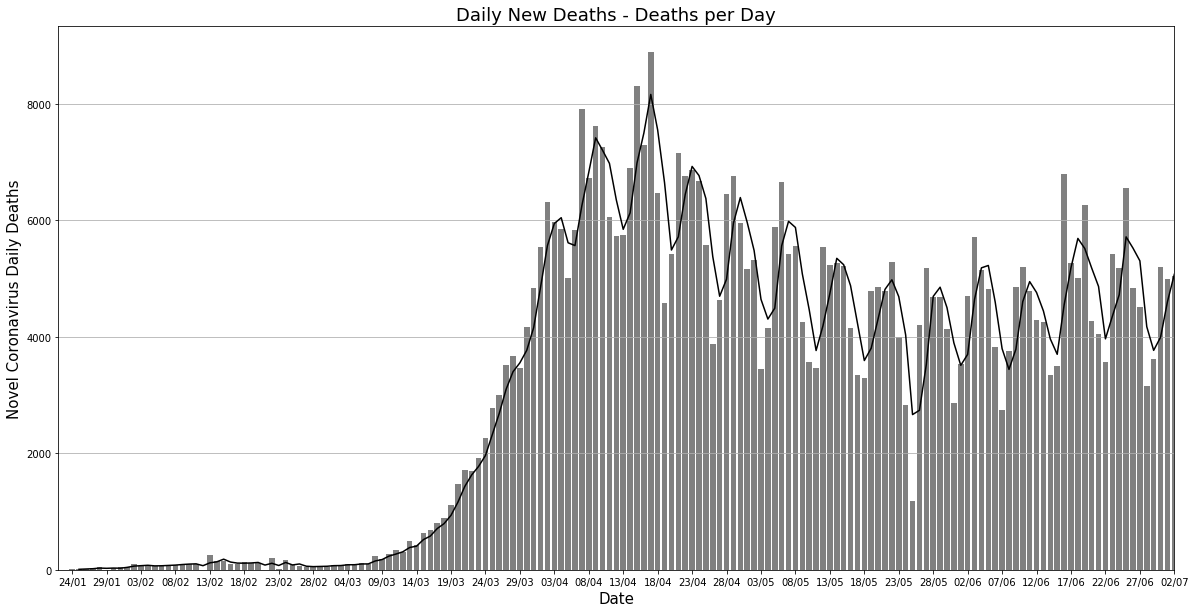

In [5]:
# Total Deaths by country - Linear Scale
name_of_y_ticks = [0,100000,200000,300000,400000,500000,600000,700000]
change_it_to_what_you_want = [0,'1K','2K','3K','4K','5K','6K','7K']

fig, ax = plt.subplots(figsize = (20, 10))
ax.plot(all_deaths, Label = 'Deaths')

# Setting the limits for the graph area
axes = plt.gca()
axes.set_ylim([0,700000])
axes.set_xlim([all_deaths.index.values[0], all_deaths.index.values[-1]])

# Setting up descriptional details
ax.set_ylabel("Total Coronavirus Deaths", fontsize = 15)
ax.set_xlabel("Date", fontsize = 15)
ax.set_title("Total Deaths (Linear Scale)", fontsize = 18)

# Formatting dates for the x-axis
date_form = mdates.DateFormatter("%d/%m")
ax.xaxis.set_major_formatter(date_form)
ax.xaxis.set_major_locator(mdates.HourLocator(interval = 120))
ax.grid(axis = 'y')

# Displaying the label below x-axis
plt.yticks(name_of_y_ticks, change_it_to_what_you_want)
plt.legend(loc = 'upper right', bbox_to_anchor = (0.25, -0.05))
plt.show()

# Daily New Deaths
# Plotting the two graphs
fig, ax = plt.subplots(figsize = (20, 10))
ax.bar(all_deaths.diff().index.values, all_deaths.diff().values, color = 'grey')
ax.plot(all_deaths.diff().rolling(window = 3).mean(), color = 'black')

# Setting up descriptional details
ax.set_ylabel("Novel Coronavirus Daily Deaths", fontsize = 15)
ax.set_xlabel("Date", fontsize = 15)
ax.set_title("Daily New Deaths - Deaths per Day", fontsize = 18)

# Formatting the date for the x-axis
date_form = mdates.DateFormatter("%d/%m")
ax.xaxis.set_major_formatter(date_form)
ax.xaxis.set_major_locator(mdates.HourLocator(interval = 120))

axes = plt.gca()
axes.set_xlim([all_deaths.index.values[0], all_deaths.index.values[-1]])
ax.grid(axis = 'y')

plt.show()